#**Analysis of Factors affecting House Prices in US**
Dataset contains a list of various houses for sale by region in the USA 




# **Data Analysis**

**Load Data**

In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
import pandas as pd
import pandas_profiling 
from scipy.stats import iqr as sc
import statsmodels.api as sm

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
import plotly.express as px
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# load the realtor data
housing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/realtor-data.csv') 

#View First 25 Records
housing.head(25)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,for_sale,179000.0,4.0,3.0,0.46,"Bo Calabazas San Sebastian, San Sebastian, PR,...",Bo Calabazas San Sebastian,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,for_sale,50000.0,3.0,1.0,0.20,"49.1 140, Ciales, PR, 00639",49.1 140,Ciales,Puerto Rico,639.0,2040.0,NaN
7,for_sale,71600.0,3.0,2.0,0.08,"3467 St, Ponce, PR, 00731",3467 St,Ponce,Puerto Rico,731.0,1050.0,NaN
8,for_sale,100000.0,2.0,1.0,0.09,"230 Rio De Vida, Ponce, PR, 00730",230 Rio De Vida,Ponce,Puerto Rico,730.0,1092.0,NaN
9,for_sale,300000.0,5.0,3.0,7.46,"Pr 120 Bo Maravilla Sur K M # 335, Las Marias,...",Pr 120 Bo Maravilla Sur K M # 335,Las Marias,Puerto Rico,670.0,5403.0,NaN


**Cleaning Data**

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813159 entries, 0 to 813158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        813159 non-null  object 
 1   price         813088 non-null  float64
 2   bed           690360 non-null  float64
 3   bath          700599 non-null  float64
 4   acre_lot      600242 non-null  float64
 5   full_address  813159 non-null  object 
 6   street        811536 non-null  object 
 7   city          813087 non-null  object 
 8   state         813159 non-null  object 
 9   zip_code      812955 non-null  float64
 10  house_size    561288 non-null  float64
 11  sold_date     393392 non-null  object 
dtypes: float64(6), object(6)
memory usage: 74.4+ MB


In [ ]:
#how many missing values?
housing.isna().sum()

status               0
price               71
bed             122799
bath            112560
acre_lot        212917
full_address         0
street            1623
city                72
state                0
zip_code           204
house_size      251871
sold_date       419767
dtype: int64

Dataset has a lot of NA values. Certain columns redundant or useless 

In [ ]:
#drop N/A
housing.dropna(inplace = True)

In [ ]:
# How many Duplicate addresses? 
housing.duplicated(subset="full_address")

829       False
3380       True
5083       True
5387       True
9053       True
          ...  
813125     True
813136     True
813137     True
813141     True
813142     True
Length: 214560, dtype: bool

In [ ]:
# drop dupes
housing.drop_duplicates(subset=['full_address'], inplace = True)
housing.index = np.arange(housing.index.size)

In [ ]:
#clean data
h = housing.drop(['status', 'full_address', 'street'], axis = 1)
h.head(10)

,price,bed,bath,acre_lot,city,state,zip_code,house_size,sold_date
0,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
1,950000.0,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2,6899000.0,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3,525000.0,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
4,289900.0,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
5,384900.0,3.0,2.0,0.46,Agawam,Massachusetts,1001.0,1476.0,1986-11-20
6,199999.0,3.0,2.0,1.76,Agawam,Massachusetts,1001.0,1968.0,2008-09-19
7,419000.0,4.0,2.0,2.00,Pelham,Massachusetts,1002.0,1607.0,2005-07-25
8,745000.0,4.0,3.0,0.56,Amherst,Massachusetts,1002.0,2847.0,1992-06-24
9,875000.0,4.0,4.0,1.50,Pelham,Massachusetts,1002.0,4366.0,1996-07-12


In [ ]:
#New column with year 
year = list()
for i in h["sold_date"]:
    year.append(int(str(i)[:4]))
h["year"] = year
h.head(5)

,price,bed,bath,acre_lot,city,state,zip_code,house_size,sold_date,year
0,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019
1,950000.0,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,2013
2,6899000.0,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,2018
3,525000.0,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014
4,289900.0,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012


In [ ]:
#Remove the NaN values from the dataset
h.isnull().sum()
h.dropna(how='any',inplace=True)
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31305 entries, 0 to 31304
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       31305 non-null  float64
 1   bed         31305 non-null  float64
 2   bath        31305 non-null  float64
 3   acre_lot    31305 non-null  float64
 4   city        31305 non-null  object 
 5   state       31305 non-null  object 
 6   zip_code    31305 non-null  float64
 7   house_size  31305 non-null  float64
 8   sold_date   31305 non-null  object 
 9   year        31305 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.6+ MB


**Explaratory Data Analysis**

In [ ]:
#how many missing values?
h.isna().sum()

price         0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
sold_date     0
year          0
dtype: int64

In [ ]:
# double check the resulting data
h.agg(['mean','std','skew'])

,price,bed,bath,acre_lot,zip_code,house_size,year
mean,7.156582e+05,3.616451,2.642038,4.453711,9297.508705,2254.583996,2008.110366
std,1.348098e+06,1.413962,1.462242,192.797844,5382.559636,1922.571671,10.574139
skew,1.398767e+01,3.382185,2.909360,76.099207,0.773626,7.812648,-0.759031


In [ ]:
h.bed.agg(['max','mean','std'])

max     47.000000
mean     3.616451
std      1.413962
Name: bed, dtype: float64

In [ ]:
# Retrieve multiple values: 1st, 2nd and 5th.
h.iloc[[0,1,4]]

,price,bed,bath,acre_lot,city,state,zip_code,house_size,sold_date,year
0,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019
1,950000.0,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,2013
4,289900.0,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012


In [ ]:
# total distinct purposes in dataset
h.groupby('zip_code').count()

,price,bed,bath,acre_lot,city,state,house_size,sold_date,year
zip_code,,,,,,,,,
802.0,2,2,2,2,2,2,2,2,2
949.0,1,1,1,1,1,1,1,1,1
1001.0,4,4,4,4,4,4,4,4,4
1002.0,12,12,12,12,12,12,12,12,12
1005.0,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...
19808.0,57,57,57,57,57,57,57,57,57
19809.0,26,26,26,26,26,26,26,26,26
19810.0,23,23,23,23,23,23,23,23,23


In [ ]:
h[h.bath<4].groupby(h.price).sum()

,price,bed,bath,acre_lot,zip_code,house_size,year
price,,,,,,,
10000.0,10000.0,4.0,2.0,8.80,2093.0,3281.0,2003
15000.0,15000.0,3.0,1.0,0.02,19013.0,724.0,2006
20000.0,20000.0,3.0,1.0,0.40,12883.0,1584.0,2012
23000.0,23000.0,2.0,1.0,2.50,12865.0,672.0,1996
23900.0,23900.0,3.0,1.0,0.03,19805.0,1025.0,2007
...,...,...,...,...,...,...,...
6499000.0,6499000.0,3.0,3.0,0.06,10012.0,2692.0,2002
6950000.0,6950000.0,4.0,3.0,0.04,11201.0,2820.0,2009
7995000.0,7995000.0,5.0,3.0,0.28,8202.0,1832.0,2022


In [ ]:
#how many states have a price less than 500,000? One row for each credit policy
h[h['price']<500000].groupby(h.state).count()

,price,bed,bath,acre_lot,city,state,zip_code,house_size,sold_date,year
state,,,,,,,,,,
Connecticut,4007,4007,4007,4007,4007,4007,4007,4007,4007,4007
Delaware,650,650,650,650,650,650,650,650,650,650
Maine,285,285,285,285,285,285,285,285,285,285
Massachusetts,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110
New Hampshire,442,442,442,442,442,442,442,442,442,442
New Jersey,5952,5952,5952,5952,5952,5952,5952,5952,5952,5952
New York,969,969,969,969,969,969,969,969,969,969
Pennsylvania,4084,4084,4084,4084,4084,4084,4084,4084,4084,4084
Puerto Rico,1,1,1,1,1,1,1,1,1,1


In [ ]:
#mean price by year
h.groupby('year')['price'].mean()

year
1901    339000.000000
1910    269000.000000
1952    649900.000000
1953    145000.000000
1955    527900.000000
            ...      
2019    616381.018304
2020    636771.425336
2021    650840.564530
2022    758278.652113
2023    789210.000000
Name: price, Length: 71, dtype: float64

In [ ]:
#mean bath by year in NY
h[h.state=='New York'].groupby('year')['bath'].sum()

year
1971      2.0
1973      1.0
1974      7.0
1975     11.0
1976      8.0
1977      9.0
1978      8.0
1979     24.0
1980     19.0
1981     29.0
1982     28.0
1983     46.0
1984     53.0
1985    128.0
1986    123.0
1987    138.0
1988    125.0
1989     82.0
1990    140.0
1991    145.0
1992    111.0
1993    130.0
1994    189.0
1995    226.0
1996    213.0
1997    320.0
1998    277.0
1999    314.0
2000    254.0
2001    274.0
2002    331.0
2003    300.0
2004    535.0
2005    465.0
2006    469.0
2007    464.0
2008    343.0
2009    242.0
2010    268.0
2011    315.0
2012    311.0
2013    423.0
2014    401.0
2015    485.0
2016    568.0
2017    617.0
2018    583.0
2019    565.0
2020    396.0
2021    662.0
2022    175.0
Name: bath, dtype: float64

# **Visualizing**

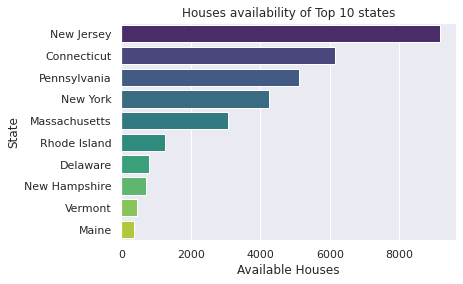

In [ ]:
#states with most houses
sns.set_style('darkgrid')
ch=h['state'].value_counts()[:10]
sns.barplot(x=ch,y=ch.index,palette='viridis')
plt.xlabel('Available Houses')
plt.ylabel('State')
plt.title("Houses availability of Top 10 states")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


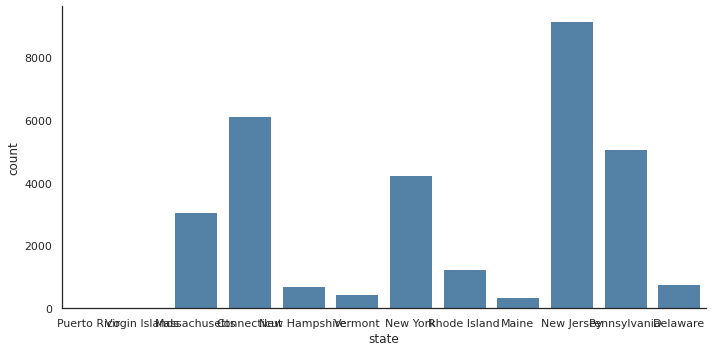

In [ ]:
#how many states? 
with sns.axes_style('white'):
  g = sns.factorplot("state", data = h, aspect=2,
                     kind="count", color='steelblue')

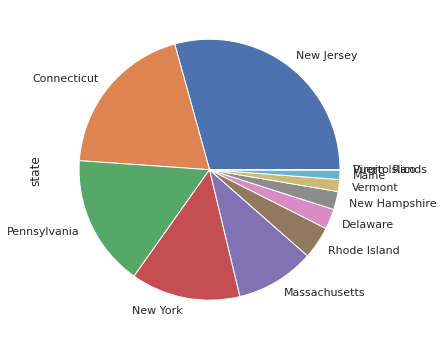

In [ ]:
h['state'].value_counts().plot(kind='pie', figsize=(6,6))

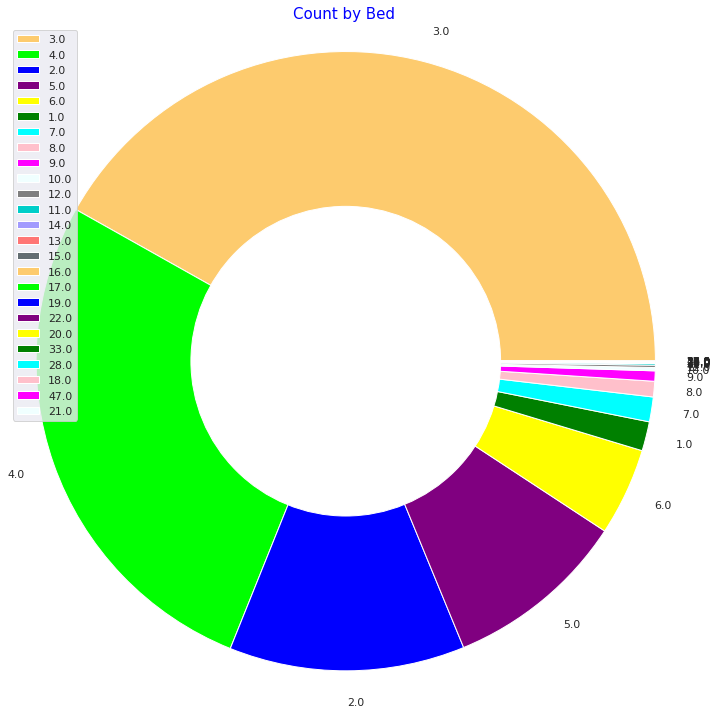

In [ ]:
#Count by Bed
h.dropna(inplace = True)
labels = h.bed.value_counts().index
colors = ['#fdcb6e','lime','blue','purple','yellow','green','cyan','pink','magenta','azure','gray','#00cec9','#a29bfe','#ff7675','#636e72']
sizes = h.bed.value_counts().values
explode=np.zeros((len(h.bed.unique()),), dtype=int)
# visual
plt.figure(figsize = (10,10))
plt.title('Count by Bed',color = 'blue',fontsize = 15)
patches, texts = plt.pie(sizes,explode=explode, labels=labels, colors=colors)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
h.head(1)

,price,bed,bath,acre_lot,city,state,zip_code,house_size,sold_date,year
0,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019


In [ ]:
#3-D plot
fig = px.scatter_3d(h, x='bed', y='bath', z='house_size',
              color='state')
fig.show()

Text(0, 0.5, 'Number')

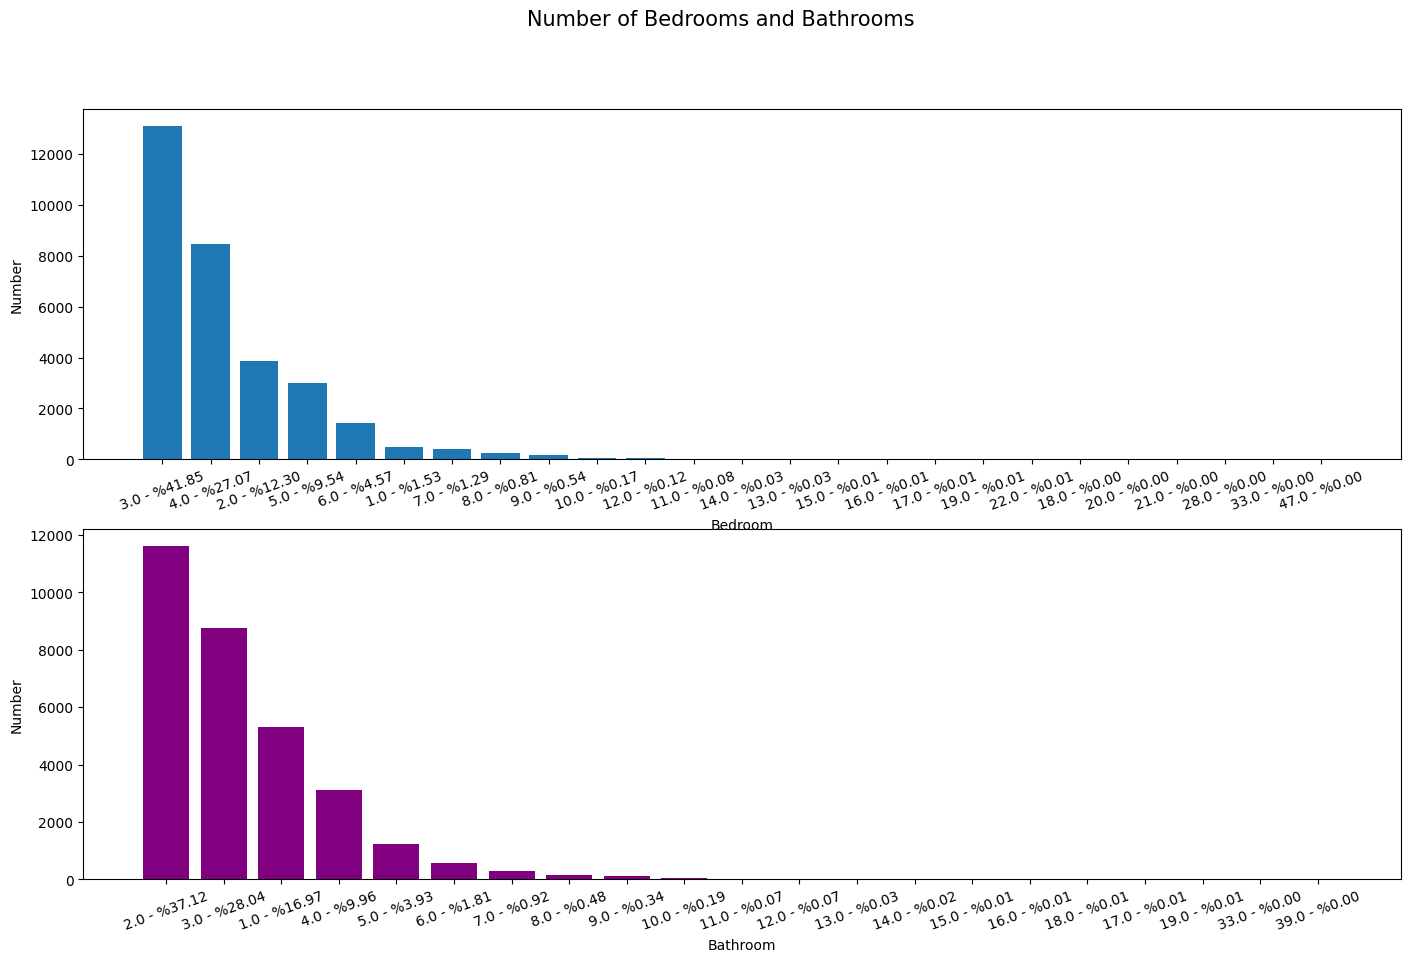

In [ ]:
plt.style.use('default')

plt.figure(figsize=(17, 10))
plt.suptitle("Number of Bedrooms and Bathrooms", fontsize = 15)

# # # # # # # # # # # # # # # # # # # # # # # # Bedroom

bed = h.value_counts("bed")
labels = list()
for i, j in enumerate(bed):
    labels.append("{} - %{:.2f}".format(bed.index[i], 100*j/bed.sum()))
    
plt.subplot(2,1,1)
plt.bar(labels, bed)
plt.xticks(rotation = 20)
plt.xlabel("Bedroom")
plt.ylabel("Number")

# # # # # # # # # # # # # # # # # # # # # # # # Bathroom

bath = h.value_counts("bath")
labels = list()
for i, j in enumerate(bath):
    labels.append("{} - %{:.2f}".format(bath.index[i], 100*j/bath.sum()))
    
plt.subplot(2,1,2)
plt.bar(labels, bath, color = "purple")
plt.xticks(rotation = 20)
plt.xlabel("Bathroom")
plt.ylabel("Number")


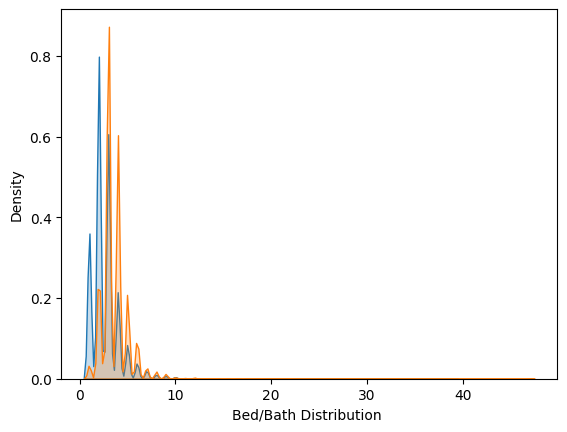

In [ ]:
sns.kdeplot(h["bath"], label='IR', shade=True)
sns.kdeplot(h["bed"], label='FC', shade=True)
plt.xlabel('Bed/Bath Distribution ');

Text(0.5, 1.0, 'Relation of Price to Bedroom and Bathroom')

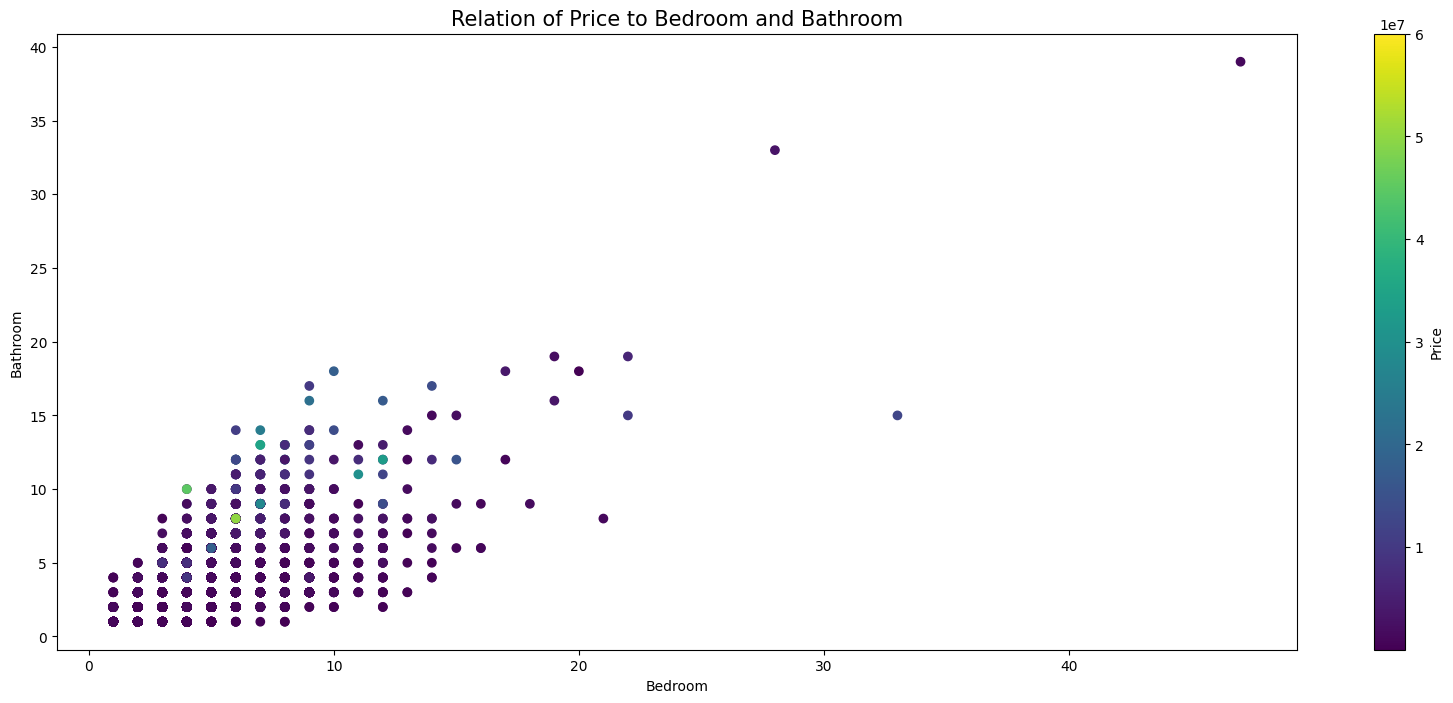

In [ ]:
# Relation of Price to Bedroom and Bathroom
plt.figure(figsize=(20, 8))
x, y, z = h["bed"], h["bath"], h["price"]

sc = plt.scatter(x, y, c = z)
plt.xlabel("Bedroom")
plt.ylabel("Bathroom")
plt.colorbar(sc, label = "Price")
plt.title("Relation of Price to Bedroom and Bathroom", fontsize = 15)

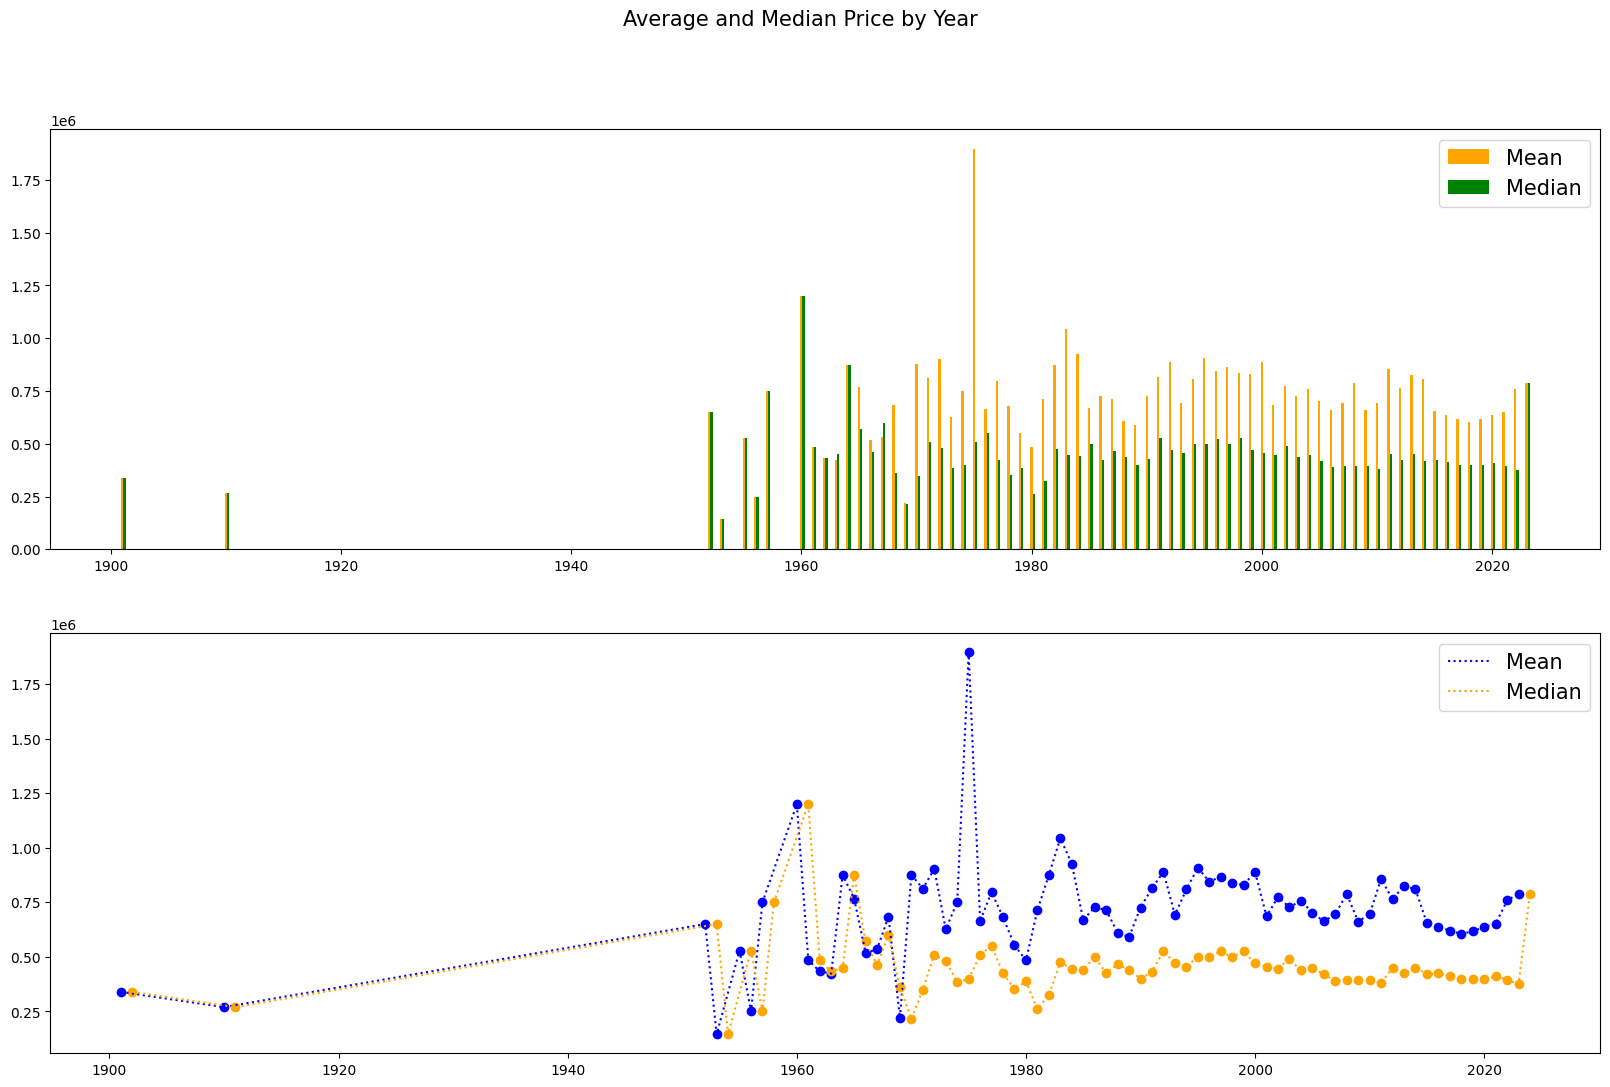

In [ ]:
meanPrice = h.groupby("year")["price"].mean()
medianPrice = h.groupby("year")["price"].median()

meanPrice.index.sort_values(ascending = False)
medianPrice.index.sort_values(ascending = False)

plt.figure(figsize = (20, 12))
plt.suptitle("Average and Median Price by Year", fontsize = 15)

plt.subplot(2,1,1)
plt.bar(meanPrice.index, meanPrice, width = 0.2, color = "orange")
plt.bar(medianPrice.index+0.2, medianPrice, width = 0.2, color = "green")
plt.legend(["Mean", "Median"], fontsize = 15)

plt.subplot(2,1,2)
plt.scatter(meanPrice.index, meanPrice, color = "blue")
plt.scatter(medianPrice.index+1, medianPrice, color = "orange")
plt.plot(meanPrice.index, meanPrice, linestyle = ":", color = "blue")
plt.plot(medianPrice.index+1, medianPrice, linestyle = ":", color = "orange",)
plt.legend(["Mean", "Median"], fontsize = 15)

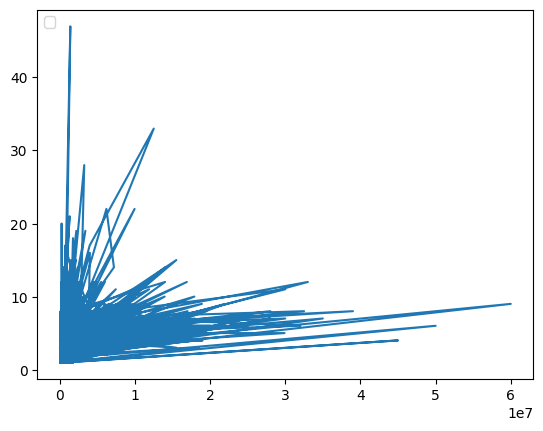

In [ ]:
plt.plot(h['price'], h['bed'])
plt.legend(ncol=2, loc='upper left');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



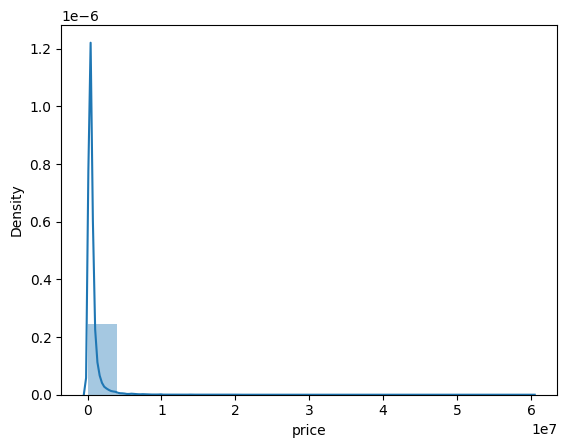

In [ ]:
#price
sns.distplot(h['price'], bins=15, kde= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



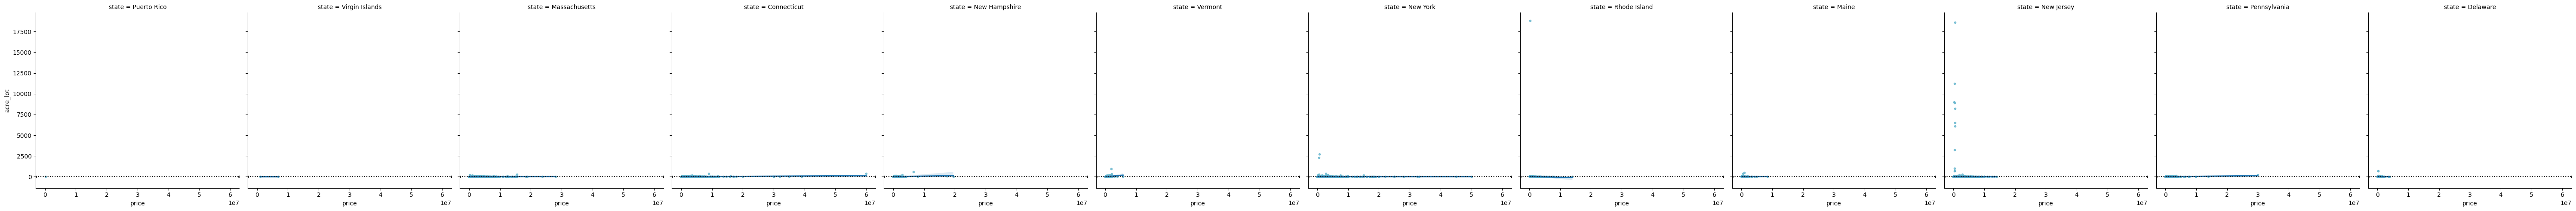

In [ ]:
g = sns.lmplot('price', 'acre_lot', col='state', data= h,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

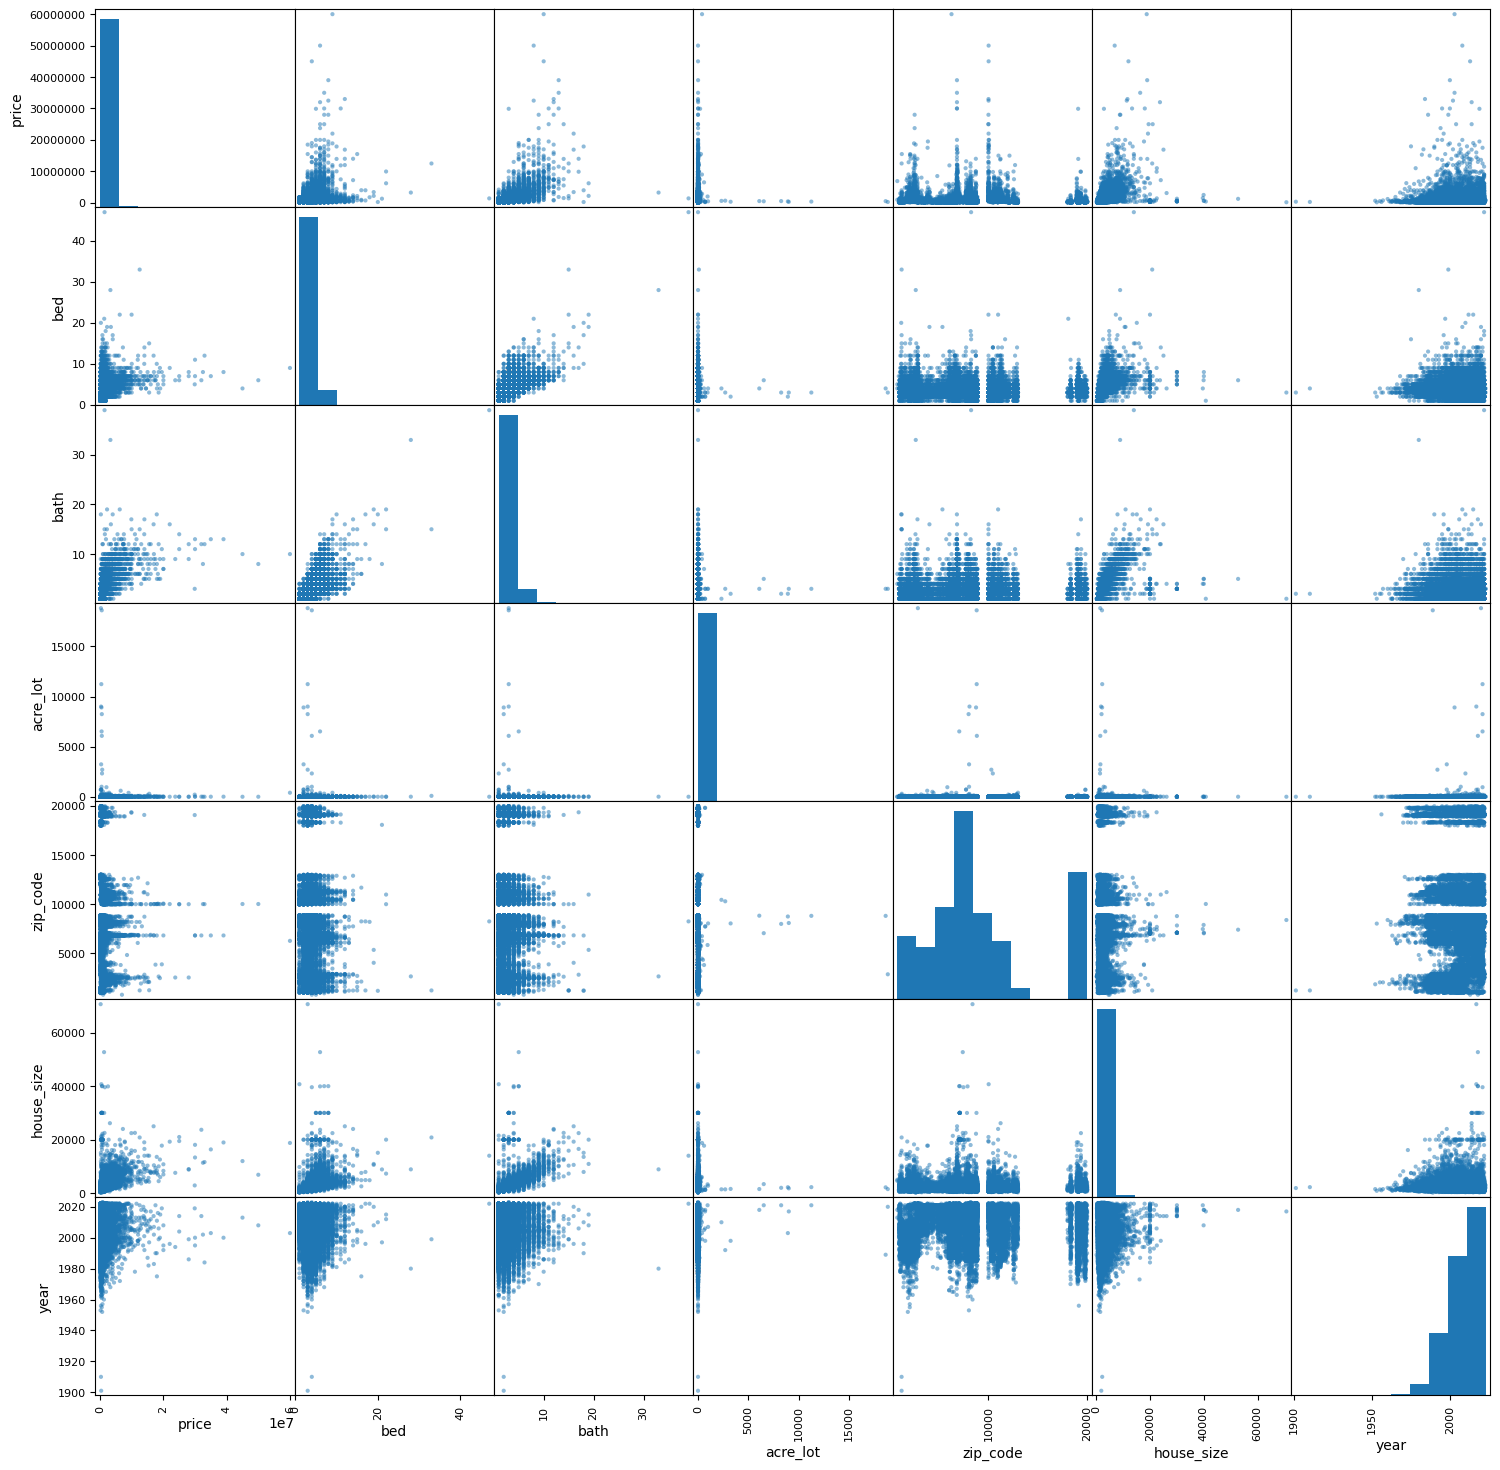

In [ ]:
scaMat = pd.plotting.scatter_matrix(h, alpha = 0.5, figsize=(18, 18), marker = ".")

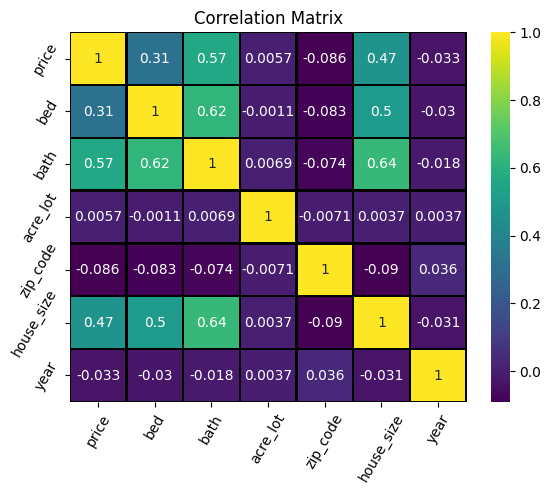

In [ ]:
#correlations 
plt.figure(dpi=100)
plt.title('Correlation Matrix')
sns.heatmap(h.corr(),annot=True,lw=1,linecolor='black',cmap='viridis')
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()



Convert categorical values to numerical values. 



In [ ]:
ench = h.copy()
ench.head(10)

,price,bed,bath,acre_lot,city,state,zip_code,house_size,sold_date,year
0,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019
1,950000.0,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,2013
2,6899000.0,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,2018
3,525000.0,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014
4,289900.0,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012
5,384900.0,3.0,2.0,0.46,Agawam,Massachusetts,1001.0,1476.0,1986-11-20,1986
6,199999.0,3.0,2.0,1.76,Agawam,Massachusetts,1001.0,1968.0,2008-09-19,2008
7,419000.0,4.0,2.0,2.00,Pelham,Massachusetts,1002.0,1607.0,2005-07-25,2005
8,745000.0,4.0,3.0,0.56,Amherst,Massachusetts,1002.0,2847.0,1992-06-24,1992
9,875000.0,4.0,4.0,1.50,Pelham,Massachusetts,1002.0,4366.0,1996-07-12,1996


In [ ]:
def Encode(h):
    for column in h.columns[h.columns.isin(['city', 'state', 'zip_code'])]:
        h[column] = h[column].factorize()[0]
    return h

encodedhousing = Encode(h.copy())

#encodedhousing
#encodedhousing.tail(10)

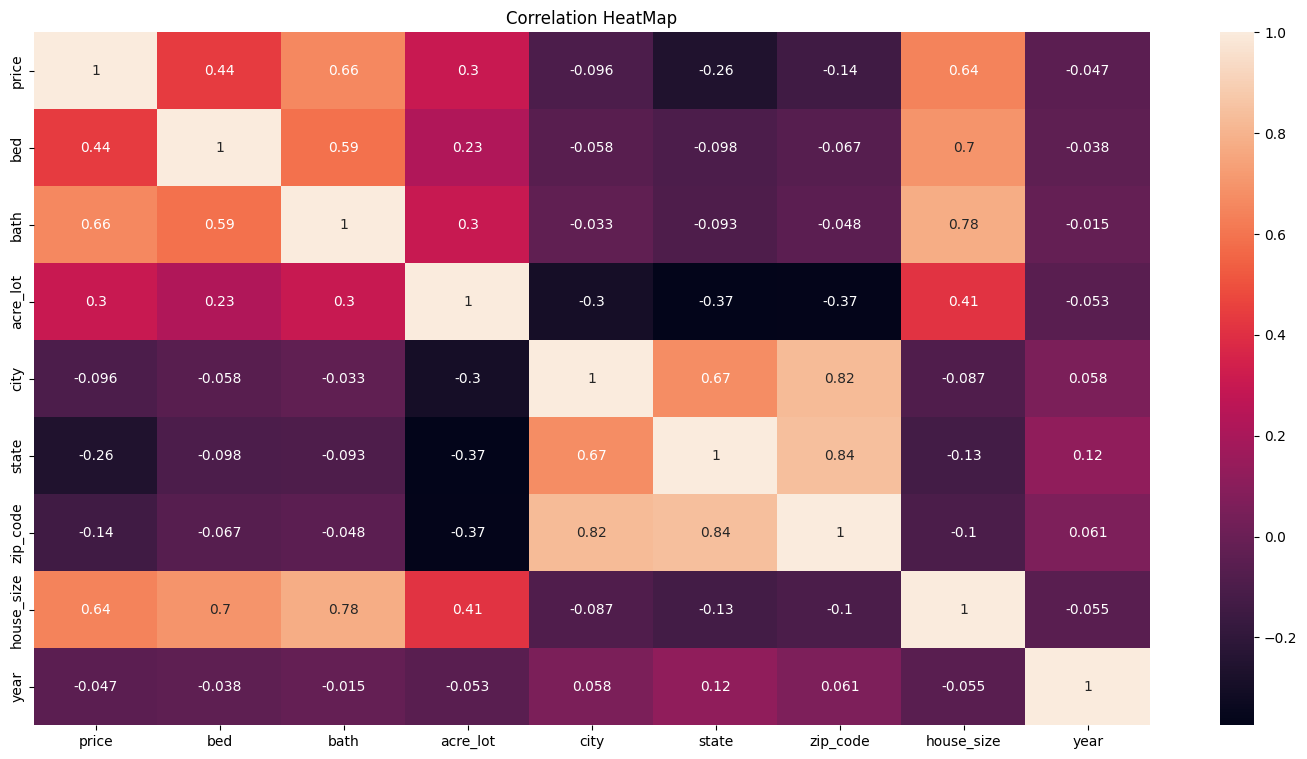

In [ ]:
#Get Correlation between different variables
corr = encodedhousing.corr(method='spearman')
plt.figure(figsize=(18,9))
plt.title("Correlation HeatMap")
sns.heatmap(corr, annot=True)

Price has a high correlation to Bath and House Size. Bed is also important while State,has negative coefficient meaning no impact on price.

# **Predictive Models**

In [ ]:
#Defining X and Y for model, Train-test split
X = encodedhousing[['bed', 'bath','acre_lot','city','state','zip_code','house_size']]
y = encodedhousing['price']
#Getting Test and Training Set, change test_size to change the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
X_train.shape, y_train.shape

((18783, 7), (18783,))

In [ ]:
## Linear Regression Algorithm 
reg = linear_model.LinearRegression()  
# train the model using the training sets
reg.fit(X_train, y_train)

#Some LinReg Model
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)


0.353668973705219

In [ ]:
y_pred

array([ 774667.68279758,  768828.29835063, 1038992.1227284 , ...,
        270341.50476447, -201425.78177376, 1758332.36532248])

In [ ]:
#OLS REGRESSION
#https://www.statsmodels.org/devel/examples/notebooks/generated/ols.html

#Add constant because stat model need constant
X_train_addconst = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_addconst)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1478.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:27:22   Log-Likelihood:            -2.8700e+05
No. Observations:               18783   AIC:                         5.740e+05
Df Residuals:                   18775   BIC:                         5.741e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.671e+05   2.84e+04     -5.879      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
## Decision Tree Algorithm 
decision_model = DecisionTreeRegressor()  
decision_model.fit(X_train, y_train) 
y_predict = decision_model.predict(X_test)
r2_score(y_test,y_predict)

0.2547529723745141

In [ ]:
y_predict

array([460000., 224900., 290000., ..., 335000., 150000., 849999.])

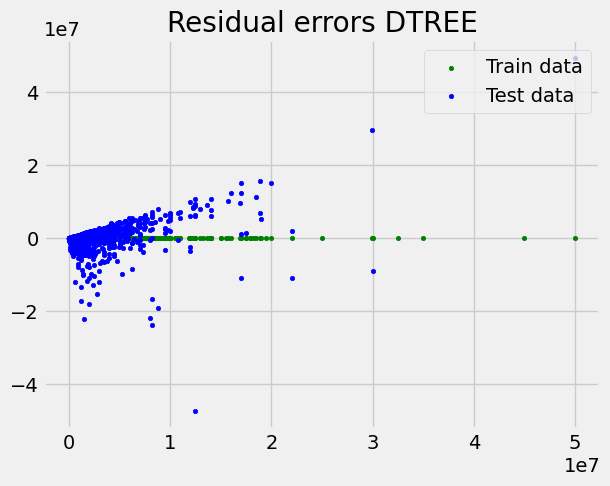

In [ ]:
# plot for residual error
  
plt.style.use('fivethirtyeight')
  
## plotting residual errors in train-test data
plt.scatter(decision_model.predict(X_train), decision_model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(decision_model.predict(X_test), decision_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
plt.title("Residual errors DTREE")
plt.show()

In [ ]:
## Random Forest
rf=RandomForestRegressor(n_estimators=200, max_depth=10)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)

0.6001928267555765

In [ ]:
## Extra Tree Regression
ETree=ExtraTreesRegressor(n_estimators = 200)
ETree.fit(X_train,y_train)
y_predict=ETree.predict(X_test)
r2_score(y_test,y_predict)

0.630929661627698

In [ ]:
y_predict

array([594725.  , 310517.7 , 310599.47, ..., 354389.5 , 141360.  ,
       932937.76])

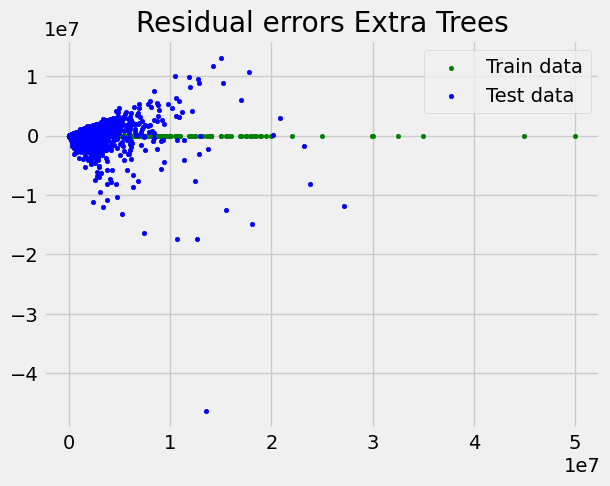

In [ ]:
plt.style.use('fivethirtyeight')
  
plt.scatter(ETree.predict(X_train), ETree.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(ETree.predict(X_test), ETree.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
plt.title("Residual errors Extra Trees")
plt.show()

In [ ]:
## Gradient Boosting Regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predict=gbr.predict(X_test)
r2_score(y_test,y_predict)

0.5779619571677974

In [ ]:
## XGBoost

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.25, max_depth = 15, n_estimators = 100)
xgb.fit(X_train, y_train)
y_predict=xgb.predict(X_test)
r2_score(y_test,y_predict)

[14:27:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5318161235462006

In [ ]:
y_predict

array([502962.16, 193243.83, 294227.2 , ..., 324404.12, 147889.73,
       969981.94], dtype=float32)

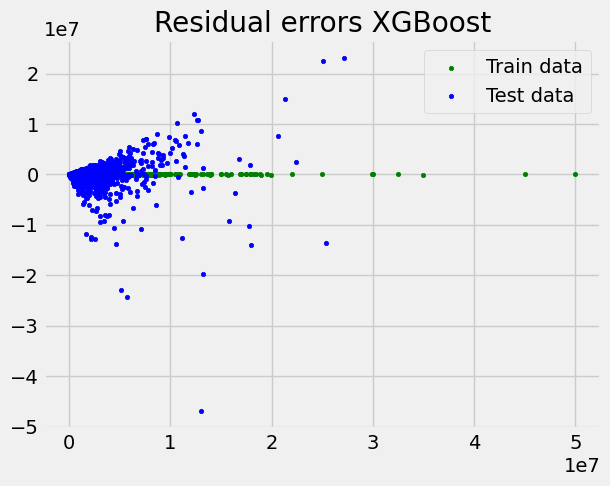

In [ ]:
plt.style.use('fivethirtyeight')
  
plt.scatter(xgb.predict(X_train), xgb.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(xgb.predict(X_test), xgb.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
plt.title("Residual errors XGBoost")
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Gradient Boost', 'Random Forest', 'Extra Tree Regressor', 'XgBoost'],
    'Score' : [reg.score(X_test, y_test), decision_model.score(X_test, y_test), gbr.score(X_test, y_test), rf.score(X_test, y_test), 
               ETree.score(X_test, y_test), xgb.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Extra Tree Regressor,0.630930
3,Random Forest,0.600193
2,Gradient Boost,0.577962
5,XgBoost,0.531816
0,Linear Regression,0.353669
1,Decision Tree,0.254753


**Successfully trained and built multiple models on the dataset.** 

The XGBoost regressor works incredibly well for this data,R2 score of ~92%. 

Once the model has been trained and tested on the data, we can actually predict the prices for new residential houses given the independents are provided.

**Neutral Network **

In [ ]:
h.describe()

,price,bed,bath,acre_lot,zip_code,house_size,year
count,3.130500e+04,31305.000000,31305.000000,31305.000000,31305.000000,31305.000000,31305.000000
mean,7.156582e+05,3.616451,2.642038,4.453711,9297.508705,2254.583996,2008.110366
std,1.348098e+06,1.413962,1.462242,192.797844,5382.559636,1922.571671,10.574139
min,1.000000e+04,1.000000,1.000000,0.000000,802.000000,170.000000,1901.000000
25%,2.750000e+05,3.000000,2.000000,0.090000,6360.000000,1300.000000,2001.000000
50%,4.200000e+05,3.000000,2.000000,0.200000,8060.000000,1798.000000,2009.000000
75%,6.999000e+05,4.000000,3.000000,0.530000,11201.000000,2600.000000,2017.000000
max,6.000000e+07,47.000000,39.000000,18817.000000,19977.000000,70626.000000,2023.000000


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
X = h.drop(["price","state","city","sold_date"],axis=1)
y = h["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('Root Mean Squared Error (Train set):',rmse)

Root Mean Squared Error (Train set): 556014.0017036939


In [ ]:
knn_model.score(X_train,y_train)

0.8411415066307835

In [ ]:
train_preds

array([300000. , 788999.5, 517450. , ..., 362000. , 312250. , 249900. ])

# Alternatives

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
x = h[["bed", "bath", "acre_lot","zip_code", "house_size"]]
y = h[["price"]]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [ ]:
#Support Vector

regSVR=SVR(kernel='linear')
regSVR.fit(xTrain,yTrain)
yPredRegSVR=regSVR.predict(xTest)
mean_squared_error(yPredRegSVR, yTest)

In [ ]:
LR = LinearRegression()
LR.fit(xTrain, yTrain)
predLR = LR.predict(xTest)
predLR

In [ ]:
DT = DecisionTreeRegressor(random_state = 0)  
DT.fit(xTrain, yTrain)
predDT = DT.predict(xTest)
predDT

In [ ]:
RF = RandomForestRegressor(n_estimators = 10, random_state=0)
RF.fit(xTrain , yTrain.values.ravel())
predRF = RF.predict(xTest)
predRF

In [ ]:
r2_0 = r2_score(yTest, predLR)
print("Linear Regression R-squared Score        : {}".format(r2_0))

r2_1 = r2_score(yTest, predDT)
print("Decision Tree Regressor R-squared Score  : {}".format(r2_1))

r2_2 = r2_score(yTest, predRF)
print("Random Forest Regressor R-squared Score  : {}".format(r2_2))

plt.barh(["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"], [r2_0, r2_1, r2_2],
        height = 0.3, color = ["#306E38", "#47924F", "#61B668"])
plt.xlim(0, 1)
plt.xlabel("Value")
plt.title("Scores")